In [123]:
import math
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import plotly.graph_objects as go
import plotly.express as px
from skimage import io
import mplcursors
import warnings
warnings.filterwarnings("ignore")

In [124]:
#work laptop
ruh_m = plt.imread('C:\\Users\\adhrit\\Documents\\Python\\amzn_FC_mapping\\HOU8_imageFlip.png')
img = io.imread('C:\\Users\\adhrit\\Documents\\Python\\amzn_FC_mapping\\HOU8_imageFlip.png')
df = pd.read_csv("C:\\Users\\adhrit\\Documents\\Python\\amzn_FC_mapping\\exampleDataPoints.csv")

#home laptop 
# ruh_m = plt.imread('C:\\Users\\adhri\\OneDrive\\Documents\\Python\\amzn_FC_mapping\\HOU8_imageFlip.png')
# img = io.imread('C:\\Users\\adhri\\OneDrive\\Documents\\Python\\amzn_FC_mapping\\HOU8_imageFlip.png')
# df = pd.read_csv("C:\\Users\\adhri\\OneDrive\\Documents\\Python\\amzn_FC_mapping\\exampleDataPoints.csv")

In [125]:
#combining x and y coord to one column in a new dataframe (ndf)
ndf = pd.DataFrame(data = df)
ndf['xy'] = ndf.values.tolist()

In [126]:
#create lists of the indexes (x and y coordinates) and their frequencies
totFreq = ndf['xy'].value_counts()
totFreqIndex_list = totFreq.index.tolist()
totFreq_list = totFreq.tolist()

In [127]:
#create new data fram with just coordinates in one column and their frequencies in the next column
xcoord, ycoord = [], []
totdf = pd.DataFrame(columns = ["x","y","totFreqIndex","totFreq"])
totdf["totFreqIndex"], totdf["totFreq"] = totFreqIndex_list, totFreq_list

#extract x and y coordinates and add to totdf
for i in range(len(totdf)):
    xcoord.append(totdf["totFreqIndex"][i][0])
    ycoord.append(totdf["totFreqIndex"][i][1])    
totdf["x"], totdf["y"] = xcoord, ycoord
totdf

,x,y,totFreqIndex,totFreq
0,372,427,"[372, 427]",5
1,807,513,"[807, 513]",4
2,377,185,"[377, 185]",4
3,243,480,"[243, 480]",3
4,195,578,"[195, 578]",3
5,519,352,"[519, 352]",2
6,897,525,"[897, 525]",2
7,623,683,"[623, 683]",2
8,622,585,"[622, 585]",1
9,795,358,"[795, 358]",1


<IPython.core.display.Javascript object>


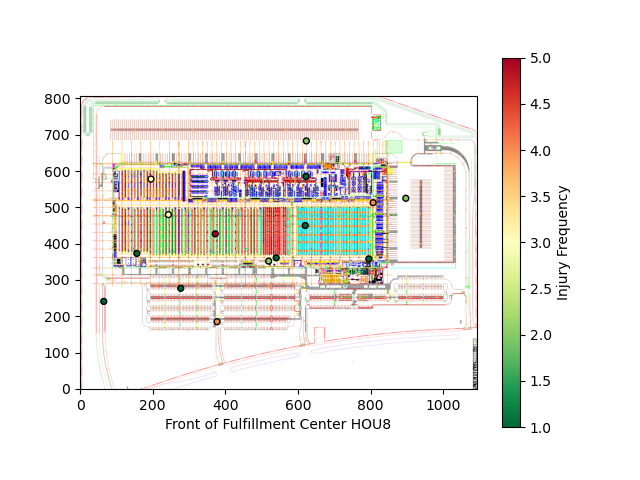

Text(0.5, 0, 'Front of Fulfillment Center HOU8')

In [128]:
fig, ax0 = plt.subplots()

im0 = plt.scatter(totdf["x"], totdf["y"],c=totdf["totFreq"], cmap='RdYlGn_r', edgecolor="k", s = 18)
plt.imshow(ruh_m, origin='lower')

cbar = fig.colorbar(im0,ax=ax0)
cbar.set_label('Injury Frequency', fontsize=10)

plt.xlabel("Front of Fulfillment Center HOU8")

#plt.savefig('HOU8_Injury_Freq.png')


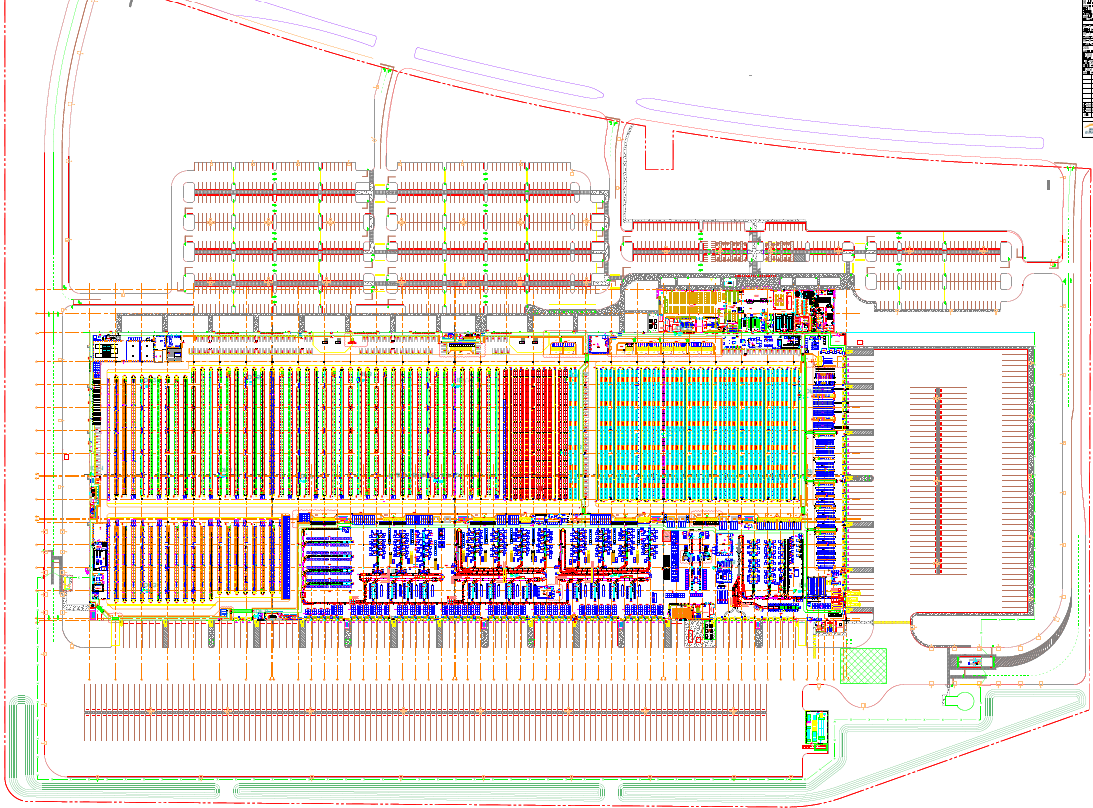

In [129]:
fig = px.imshow(img, origin='lower')
fig.add_trace(go.Scatter(x=totdf['x'], y=totdf['y'], name="", text=totdf['totFreq'],hovertemplate="Injury Frequency: %{text}", 
                mode="markers",marker=dict(size=7,color=totdf["totFreq"],colorbar=dict(title={'text': "Injury Frequency",
                'side':'top'}),line=dict(color='Black',width=1),colorscale="RdYlGn_r")))
fig.update_layout(title={'text': "Injury Frequency Heat Map for HOU 8",'y':.95,'x':0.46,'xanchor': 'center','yanchor': 'top'},
                  xaxis_title="Front of Fulfillment Center", font=dict(size=14,color="Black"))
fig.show()
#fig.write_image('HOU8_Injury_Freq.png')